<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/5.5%20Deep-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep-Learning(딥러닝)

딥러닝의 발전: 수많은 데이터와 발전된 컴퓨터 성능(GPU)으로 발전한 학습 방법<br>


머신러닝(ML) ⊃ 딥러닝 차이: 표현 학습(Representation Learning)<br>
특성공학을 위한 전처리를 하는 ML과 달리 필요 특성을 알아서 조합하는 딥러닝



---



---



## Percepron(퍼셉트론): 다수의 입력신호를 연산을 통해 하나의 신호로 출력

> 퍼셉트론 반례 : XOR(Exclusiv-OR) Problem<br>
> XOR의 11의 결과는 0이지만 1의 판단(단층 연산으로는 표현(계산)할 수 없음)하는 경우가 있음




In [ ]:
# Keras 퍼셉트론의 입력신호의 경우 출력층의 단층만 설계 시 입력층이 없는 경우가 있음

In [ ]:
# 가중치-편향(입력데이터의 고유 성향) 연산(=가중합, Weighted Sum): ∑(입력신호 * 각각의 가중치, Xw)
  np.dot(input, weight) # 퍼셉트론의 연산 끝

In [ ]:
# Activation Function(활성화 함수): 연산 결과를 얼마만큼의 신호로 출력할지 결정하는 함수
  # 활성화함수는 비선형 함수에서 사용되며, 출력 기준이 X=0인 경우가 공통점이며 linear가 디폴트 값임

### 활성화 함수 종류
1. Step: 입력값이 임계값을 초과하면 출력(Step은 미분이 불가능함으로 MLP에서 사용 불가)
2. Sigmoid: 0 < y < 1이기에 모든 범이에서 미분이 가능하며 은닉/출력층에서 사용됨
> 하지만 중복 사용 시 Vanishing Gradient(기울기 소실문제)가 발생함<br>
> (미분값이 0에 가까워져 과소적합이 발생하고, 도함수는 X=0일때, 0<y<1/4(0.25)가 됨)
3. ReLU: max(0,x)로 음의 값은 0 / 양의 값은 그대로 출력함
> ReLU는 층이 깊어도 계속 1을 곱해서 기울기의 과도한 문제가 없어 은닉층 1순위 함수
4. Softmax: 모든 클래스 값의 합이 1이 되도록 변환(Sigmoid를 다중 분류 문제 해결을 위한 일반화 형태)

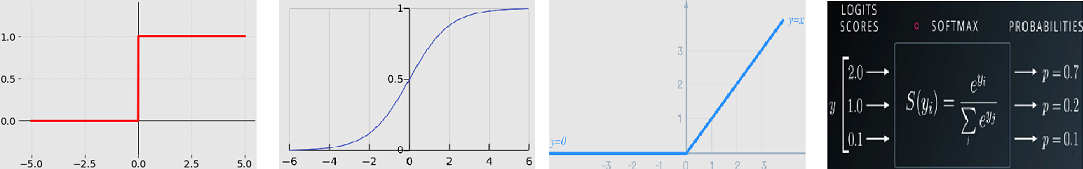

## MLP(Multi Layer Percepron, 다층 퍼셉트론 신경망)
퍼셉트론의 XOR문제를 히든 레이어층을 늘리는 것으로 문제를 해결함
> ANNs(Artificial Nerual Networks, 인공신경망) 학습법 사용

In [ ]:
# 신경망 시각화 계산 - https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.00001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.84925&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

### 신경망의 층(입력/은닉/출력 Layer)

In [ ]:
# 1. Input(입력) : 계산은 없고 데이터셋을 입력받아 전달하는 층, 노드 수는 Feature 수로 결정됨
  # 신경망 층 수(깊이)를 셀 때 제외됨 // input_shape = (행,열,채널) / input_dim = 행*열

In [ ]:
# 2. Hidden(은닉): 입력받은 값으로 가중치와 편향을 연산하는 층, 노드 수는 마음대로 결정할 수 있음
  # 일반적으로 은닉층이 2개 이상 있는 신경망을 딥러닝으로 말함
  # 은닉층 개수는 데이터의 양(많고), 문제의 복잡성(복잡하고), 하드웨어의 시간(처리 짧으면) 깊게 구성함

In [ ]:
# 3. Output(출력): 연산이 끝난 결과 값을 출력하는 층, 문제 종류에 따라 활성화 함수와 노드가 다름
  # 3-1. 이진분류: 활성화 함수는 Sigmoid, 노드는 1개
  # 3-2. 다중분류: 활성화 함수는 Softmax, 노드는 분류할 수와 같게 설정
  # 3-3.   회귀  : 활성화 함수 지정 없음, 노드는 특성 수와 같게 설정

In [ ]:
# 4. 가중치 행렬 Shape: 입력 벡터의 형태에 따라 결정됨(Keras는 자동 생성)
  # [은닉층은 Wh, 출력층은 Wo] - Wh(input 노드 수, hidden 노드 수) / Wo(hidden 노드 수, Output 노드 수)

  # 학습 파라미터: (input_dim * hidden node) + (hidden node * hidden node) + (hidden node * output node) + bias
    # or (input_dim+1) * hidden node + (hidden node * output node) + output bias

### 신경망 학습 메커니즘 - 역전파(Back-propagation) 알고리즘

In [ ]:
# 학습 중지 기준을 만족할 때까지 1~3의 과정(Iteration)을 반복

In [ ]:
# 1. 순전파(FP, Forward Propagation): 입력층에 입력된 신호가 은닉층의 연산을 거쳐 출력층으로 값을 내보내는 과정

In [ ]:
# 2. 손실계산 - 손실함수(Loss function, 예측(출력)값과 실제(타겟)값의 차이)를 계산
  # 손실함수 종류: model.compile( loss = '여기' )에서 사용
    #   회귀  : MSE, MAE
    # 이진분류: binary_crossentropy
    # 다중분류: categorical_crossentropy(one-hot encoding type), spares_categorical_crossentropy(numeric type)

In [ ]:
# 3. 역전파(편미분과 연쇄법칙): 손실정보를 출력층에서 입력층까지 전달
  # 손실(함수의 기울기)을 최소화하기 위해 가중치 갱신하는 방법: 경사하강법

  # 출력층의 어떤 값이 조정(원하는 결과는 큰 값, 나머지는 작은 값)되어야 할지 아는 것이 유용함
  # 조정값은 이전 은닉계층에서 활성화된 모든 가중합과 활성화함수와 연결됨
  # 따라서 가중치(w) , 편향(b), 이전 계층의 활성도(a)를 변경(값의 증가)하여 손실을 최소화 할 수 있다.

  # 기울기 값이 필요한 경사하강법에 편미분(파라미터가 2개 이상인 함수에서 특정 파라미터만의 기울기 구함)이 필요
  # 하지만 An = 활성화함수f ( Wn * An-1 + bn )의 식이 들어오는 노드마다 필요함
  # 게다가 미분된 값을 바로 구할 수가 없음(An의 가중치 <- y` <- 오차함수 등 과정마다 영향을 추가적으로 파악)

  # 따라서 편미분(Partial Derivatives)과 연쇄법칙(Chain rule)이 같이 적용됨
  # 합성함수의 쉬운 미분법(특정 변수의 미분값을 다른 변수의 미분으로 나타낼 수 있음)으로 모든 가중치의 합 구함
  # 이는 시작(가중치)과 끝(결과값)만으로는 업데이트가 힘들기에 중간과정을 모두 사용하는 방법

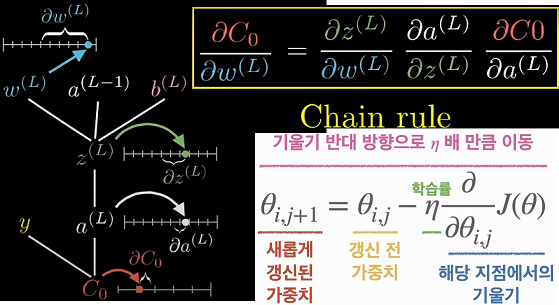

#### 역전파 Optimizer: 경사하강법의 종류

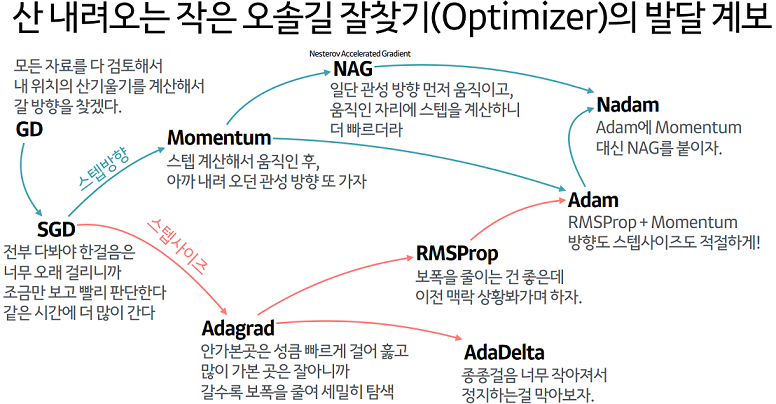

1. 경사하강법(GD): 모든 입력데이터로 손실함수 기울기를 계산하여 가중치를 업데이트함
> Iteration이 1회이기에 처리가 느리고, local minima에 빠지기 쉽다.
2. 확률적(Stochastic)GD: Iteration마다 하나의 데이터로 손실 계산후 업데이트
> 빠른 업데이트와 높은 Noise로 local minima에서도 빠져 나올 확률이 높으나 1개의 데이터로 불안정함
3. 미니 배치(Mini-batch)GD: Iteration마다 n개의 데이터(미니 배치)를 입력하여 그 결과를 바탕으로 업데이트
> Batch size의 크기는 데이터의 수 / Iteration로 일반적 2의 배수(GPU에 맞게 설정)로 설정
4. Momentum GD: 기울기의 변화가 심한 방향으로 개선하고, 완만한 방향으로 덜 개선함
> local minima에서 빠져 나올 확률이 높음
5. Adagrad: 파라미터마다 다른 학습률을 자동으로 적용(학습률 조정으로 성능 개선)
> 다만 학습이 진행될수록 학습률이 줄고, Gt값이 커져 파라미터 갱신이 거의 없음
6. Adam: Momentum과 Adagrad의 장점 융합

In [ ]:
# 1회 epochs마다 일어나는 Iteration 수 = Data / batch_size
# total interation = iteration(가중치 업데이트가 일어난 횟수) * epochs(데이터 전체를 활용한 횟수)

#### 역전파 Learning Rate(lr, 학습률): 가중치마다 기울기 값을 얼마나 경사하강법에 적용할지 결정
> 신경망은 복잡한 층 수과 많은 파라미터로 과적합 발생이 쉬운 환경, 방지 필수

##### 학습률 Regularization

In [ ]:
# 1. Weight Decay(가중치 감소): 주요 Optimizal(Adam, RMSprop etc)의 파라미터로 변경 가능
  model.compile(optimizer = tf.keras.optimizers.Adam(  lr = 0.001, beta_1 = 0.89  ) )

# 2. Scheduling: 주요 Optimizal(Adam, RMSprop etc)에 experimental 함수를 전달
  lr_decayed_fn = ( tf.keras.experimental.CosineDecayRestars(1000, 0.1) )
  # first_decay_steps = 학습률 감소 주기 / initial_learning_rate = 매 주기의 최초 학습률
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr_decayed_fn) )

In [ ]:
# Decay: 손실함수에 가중치르 조정하는 관련 L1, L2 항을 추가
# Dropout: 매 Interation마다 노드의 일부를 사용하지 않으며 학습을 진행, 평가는 모든 노드를 사용함
# Early Stopping: 검증 데이터셋 손실 증가 시 학습 종료, 파라미터 저장 경로 필요

##### 학습률 Initialization
> init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal/uniform', 'he_normal/uniform']

In [ ]:
# 1. 정규분포(표준편차를 1) 초기화: 활성화 값이 0과 1에 위치해 활성값이 고르지 못하면 과소적합

# 2. Xavier(이전 층의 노드가 n개일때, 표준편차를 1/√n) 초기화: Sigmoid에 적합
  # keras의 경우 이전 층 노드 n개, 현재 층 노드 m개면, 2/√n+m로 초기화

# 3. He(이전 층의 노드가 n개일때, 표준편차를 2/√n) 초기화: ReLU에 적합

#### Hyper Parameter - Tuning

In [ ]:
# 튜닝1: Cross-Validation  VS  Keras Tuner Tool

# 튜닝2: Grid-Search: 모든 지점의 조합을 수행, 시간 관계상 1~2개만 찾는 용도
  # 직접적인 영향을 주는 파라미터만 제대로 튜닝 후 최적값을 찾고, 나머지 조정

# 튜닝3: Random-Search: 지정 범위 내에서 무작위로 모델을 돌려보고 최고 성능 반환

# 튜닝4: Bayesian Methods: 이전 탐색의 결과를 새로운 탐색에 반영하여 성능 증가

In [ ]:
# 하이퍼 파라미터 종류
# batch_size, epochs, optimizers, learning rate, activation, Regularization(decay, dropout), 은닉층의 노드 수

### 신경망 종류

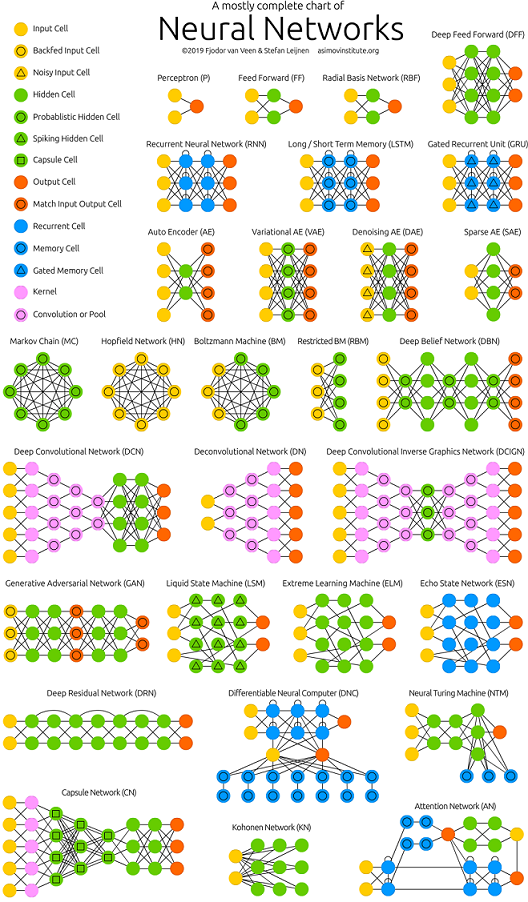